# Imports

In [1]:
import requests
import pprint
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from captioning.captioning_config import Config
pp = pprint.PrettyPrinter(indent=4, depth=6)
config = Config()
verbose = False

# Formulate Query

In [2]:
queries = ["A man is standing on a sand dune at the desert .",
#            "A man is surfing on the waves.",
#            "A black car on the road", 
#            "Two dogs running on a beach.", 
#            "Crowd of people on the road.", 
#            "Two football players are tackling a football player on the field .",
#            "A little girl in pink dress.",
#            "A woman is surfing on the waves with a surfboard.",
#            "Two little boys are playing football.",
          ]


In [3]:
image_paths = ["2886533440_dfa832f2fa.jpg",
#                "3279228339_71deaa3d9b.jpg",
#                "3606093421_eddd46c2c7.jpg",
              ]

# Helper Functions:

In [4]:
def show_img(query, image_ids):
    fig=plt.figure(figsize=(10, 10))
    if query is not "":
        fig.suptitle(f"Top 5 images for query: '{query}'", fontsize=16)

    columns = 3
    rows = 2
    for i in range(1, len(image_ids)+1):
        img = plt.imread(image_ids[i-1]) 
        fig.add_subplot(rows, columns, i)
        plt.axis("off")
        plt.imshow(img)

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

In [5]:
def get_images(model_name, bleu_index, set_name="test", is_filter="False"):
    for query in queries:
        url = f"http://0.0.0.0:5000/search/{model_name}/{set_name}/{bleu_index}/{is_filter}/{query.replace(' ', '%20')}"
        response = requests.get(url)
        json_resp = json.loads(response.text)
        image_ids = [os.path.join(config.images_dir,im.strip("\"\'\[\]")) for im in json_resp["image_ids"].split(', ')]
        if verbose:
            _tmp = [im.split('/')[-1] for im in image_ids]
            print(_tmp)
        show_img(query, image_ids)

In [6]:
import urllib
def get_images_by_image(model_name, bleu_index, set_name="test", is_filter="False"):
    for image_path in image_paths:
        image_full_path = os.path.join(config.image_search_dir, image_path)
        print(image_full_path)
        url = f"http://0.0.0.0:5000/searchbyimage/{model_name}/{set_name}/{bleu_index}/{is_filter}/{image_path}"
        print(url)
        response = requests.get(url)
        json_resp = json.loads(response.text)
        image_ids = [os.path.join(config.images_dir,im.strip("\"\'\[\]")) for im in json_resp["image_ids"].split(', ')]
        if verbose:
            _tmp = [im.split('/')[-1] for im in image_ids]
            print(_tmp)
        print("Input Image")
        show_img("", [image_full_path])
        print("Similar Images")
        show_img("", image_ids)

# Query Results for Flickr Attention Model and Bleu_Index = 1 

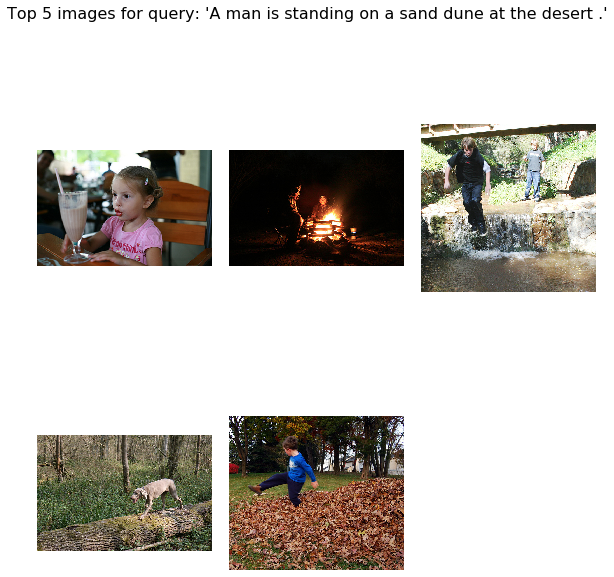

In [7]:
model_name = "flickr_attn_bert"
bleu_index = 1
get_images(model_name, bleu_index)

/home/harishkrupo/Desktop/ga/fall_20/deep learning/project/ImageQuery/captioning/data/imagesearch/2886533440_dfa832f2fa.jpg
http://0.0.0.0:5000/searchbyimage/flickr_attn_bert/test/1/False/2886533440_dfa832f2fa.jpg
Input Image


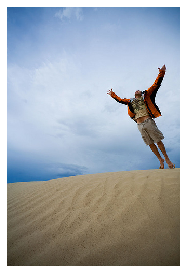

Similar Images


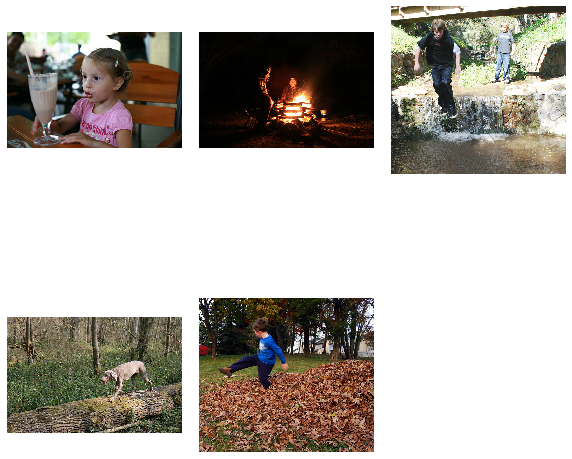

In [8]:
model_name = "flickr_attn_bert"
bleu_index = 1
get_images_by_image(model_name, bleu_index)

# Query Results for Flickr Attention Model and Bleu_Index = 1 with Filter

In [ ]:
model_name = "flickr_attn"
bleu_index = 1
get_images(model_name, bleu_index, is_filter="True")

# Query Results for Flickr Attention Model and Bleu_Index = 2 

In [ ]:
model_name = "flickr_attn"
bleu_index = 2
get_images(model_name, bleu_index)

# Query Results for Flickr Attention Model and Bleu_Index = 3

In [ ]:
model_name = "flickr_attn"
bleu_index = 3
get_images(model_name, bleu_index)

# Query Results for Flickr Attention Model and Bleu_Index = 4

In [ ]:
model_name = "flickr_attn"
bleu_index = 4
get_images(model_name, bleu_index)

# Query Results for Flickr Vanilla Model and Bleu_Index = 1

In [ ]:
model_name = "flickr"
bleu_index = 1
get_images(model_name, bleu_index)

# Query Results for Flickr Vanilla Model and Bleu_Index = 2

In [ ]:
model_name = "flickr"
bleu_index = 2
get_images(model_name, bleu_index)

# Query Results for Flickr Vanilla Model and Bleu_Index = 3

In [ ]:
model_name = "flickr"
bleu_index = 3
get_images(model_name, bleu_index)

# Query Results for Flickr Vanilla Model and Bleu_Index = 4

In [ ]:
model_name = "flickr"
bleu_index = 4
get_images(model_name, bleu_index)